<a href="https://colab.research.google.com/github/Spili11/DS_Praktikum/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kája Trachtová, Michaela Kecskéková, Martin Špilar



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [2]:
penguins_raw = pd.read_csv('/content/drive/My Drive/DS_Praktikum/penguins_size.csv', na_values='NA', skipinitialspace=True)
print(penguins_raw.tail())
print(penguins_raw.columns)

    species  island  culmen_length_mm  ...  flipper_length_mm  body_mass_g     sex
339  Gentoo  Biscoe               NaN  ...                NaN          NaN     NaN
340  Gentoo  Biscoe              46.8  ...              215.0       4850.0  FEMALE
341  Gentoo  Biscoe              50.4  ...              222.0       5750.0    MALE
342  Gentoo  Biscoe              45.2  ...              212.0       5200.0  FEMALE
343  Gentoo  Biscoe              49.9  ...              213.0       5400.0    MALE

[5 rows x 7 columns]
Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


In [3]:
label = 'sex'
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins = penguins_raw.copy()[[label] + features]

In [4]:
#unique values
print(penguins.sex.drop_duplicates())
#NaN values
print(penguins.isna().sum())
#delete observations with NaN sex and observation with '.' value
penguins = penguins.loc[penguins.sex.isin(['FEMALE', 'MALE']), :]

0        MALE
1      FEMALE
3         NaN
336         .
Name: sex, dtype: object
sex                  10
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
dtype: int64


In [5]:
#factorize label, male := 0
penguins['sex'] = pd.factorize(penguins['sex'])[0]

              sex  culmen_length_mm  ...  flipper_length_mm  body_mass_g
count  333.000000        333.000000  ...         333.000000   333.000000
mean     0.495495         43.992793  ...         200.966967  4207.057057
std      0.500732          5.468668  ...          14.015765   805.215802
min      0.000000         32.100000  ...         172.000000  2700.000000
25%      0.000000         39.500000  ...         190.000000  3550.000000
50%      0.000000         44.500000  ...         197.000000  4050.000000
75%      1.000000         48.600000  ...         213.000000  4775.000000
max      1.000000         59.600000  ...         231.000000  6300.000000

[8 rows x 5 columns]


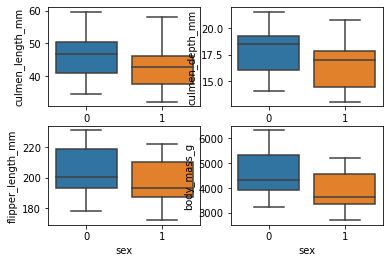

In [6]:
#basic exploratory analysis with boxplots
print(penguins.describe())

f, axes = plt.subplots(2, 2)
sns.boxplot(x=penguins['sex'],y=penguins['culmen_length_mm'], ax = axes[0][0])
sns.boxplot(x=penguins['sex'],y=penguins['culmen_depth_mm'], ax = axes[0][1])
sns.boxplot(x=penguins['sex'],y=penguins['flipper_length_mm'], ax = axes[1][0])
sns.boxplot(x=penguins['sex'],y=penguins['body_mass_g'], ax = axes[1][1])

In [7]:
#split dataset to train and test
train_dataset = penguins.sample(frac=0.7, random_state=42)
test_dataset = penguins.drop(train_dataset.index)

In [8]:
# separate label column from the data
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop(label)
test_labels = test_features.pop(label)

In [9]:
# normalizer for all feature columns
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

In [10]:
# model definition
dn_model = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1, activation = 'sigmoid') # maybe 'sigmoid activation function
])

dn_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])

In [11]:
dn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 4)                 9         
_________________________________________________________________
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,554
Trainable params: 4,545
Non-trainable params: 9
_________________________________________________________________


In [12]:
history = dn_model.fit(
    train_features, train_labels,
    validation_split=0.2, verbose = 0,
    epochs=100)

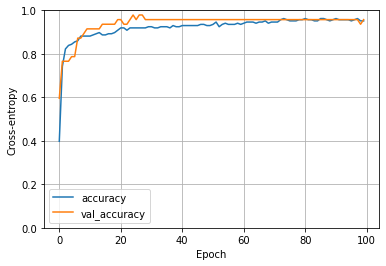

In [13]:
def plot_loss(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Cross-entropy')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [14]:
test_evaluation = {}
test_evaluation['dn_model'] = dn_model.evaluate(
    test_features,
    test_labels, verbose=0)
test_evaluation

{'dn_model': [0.27435430884361267, 0.8700000047683716]}

In [15]:
dn_model.predict(test_features)

array([[3.96750718e-01],
       [2.24791020e-01],
       [8.73787701e-02],
       [7.60621548e-01],
       [9.91042972e-01],
       [2.68164277e-03],
       [7.10965216e-01],
       [3.68104696e-01],
       [9.59739566e-01],
       [3.46150398e-01],
       [6.88180327e-03],
       [5.56030869e-03],
       [1.00328624e-02],
       [1.60739720e-02],
       [9.99681234e-01],
       [2.42918223e-01],
       [8.43393207e-01],
       [9.99811769e-01],
       [4.09343421e-01],
       [9.99163628e-01],
       [9.99753356e-01],
       [9.99827206e-01],
       [9.58949447e-01],
       [2.42433965e-01],
       [3.98307353e-01],
       [1.97632015e-02],
       [9.96264219e-01],
       [1.24104023e-02],
       [4.06269580e-01],
       [9.93631482e-01],
       [3.23733687e-03],
       [9.91816998e-01],
       [2.42583156e-02],
       [9.98710513e-01],
       [9.60451603e-01],
       [9.99022245e-01],
       [9.85367477e-01],
       [9.05790687e-01],
       [9.99719381e-01],
       [4.33535963e-01],
